In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001060523"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001060523
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,CARDINAL FINANCIAL CORP
Ticker,CFNL


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,41.0,8.023659e+00,2.444496e+00,4.92,6.41,7.09,9.1,13.77
interest income,37.0,2.181105e+07,5.368726e+06,7415000.00,20518000.00,23125000.00,24771000.0,29961000.00
net income,57.0,5.333754e+06,4.614502e+06,-4410000.00,1780000.00,3800000.00,9015000.0,14452000.00
net interest income,57.0,1.709825e+07,8.796003e+06,3444000.00,10313000.00,15267000.00,23800000.0,32965000.00
provision for loan losses,57.0,-8.207895e+05,1.029115e+06,-3500000.00,-1500000.00,-529000.00,-166000.0,990000.00


# Plots

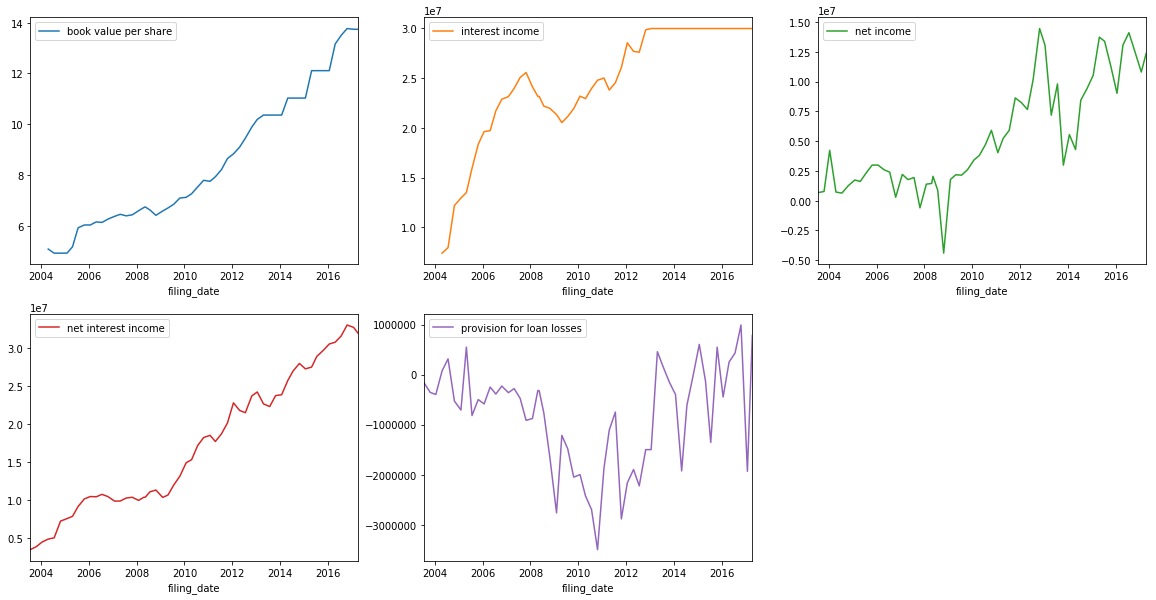

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                            
0001060523 book value per share   2003Q2 to 2003Q4: 3 periods    missing   
           book value per share   2004Q3 to 2004Q4: 2 periods    missing   
           book value per share                        2005Q4    missing   
           book value per share   2013Q2 to 2013Q4: 3 periods    missing   
           book value per share   2014Q2 to 2014Q4: 3 periods    missing   
           book value per share   2015Q2 to 2015Q4: 3 periods    missing   
           book value per share                        2017Q1    missing   
           interest income        2003Q2 to 2003Q4: 3 periods    missing   
           interest income       2013Q1 to 2017Q1: 17 periods    missing   
           net income                                  2008Q1  duplicate   
           total revenue                                 None      empty   

                                            message  
cik        item                                      
0001060523 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           interest income           Missing period  
           interest income           Missing period  
           net income              Duplicate period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()